### TASK 1 -  In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

### What will be predicted score if a student study for 9.25 hrs in a day?


In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [5]:
def cont_var_summary(x):
    n=x.count()
    nmiss=x.isnull().sum()
    avg=x.mean()
    med=x.median()
    variance=x.var()
    stdev=x.std()
    mini=x.min()
    p1=x.quantile(0.01)
    p5=x.quantile(0.05)
    p10=x.quantile(0.10)
    p25=x.quantile(0.25)
    p50=x.quantile(0.50)
    p75=x.quantile(0.75)
    p90=x.quantile(0.90)
    p95=x.quantile(0.95)
    p99=x.quantile(0.99)
    maxi=x.max()
    res=pd.Series([n,nmiss,avg,med,variance,stdev,mini,p1,p5,p10,p25,
                  p50,p75,p90,p95,p99,maxi],index=['N','NMiss','Mean','Median',
                                                  'Variance','StDev','Min','P1',
                                                  'P5','P10','P25','P50','P75',
                                                  'P90','P95','P99','Max'])
    return res

In [6]:
data.apply(cont_var_summary)

,Hours,Scores
N,25.000000,25.000000
NMiss,0.000000,0.000000
Mean,5.012000,51.480000
Median,4.800000,47.000000
Variance,6.376100,639.426667
StDev,2.525094,25.286887
Min,1.100000,17.000000
P1,1.196000,17.720000
P5,1.580000,20.200000
P10,2.140000,22.200000


In [7]:
#No Missing Values, therefore, no need for missing value imputation

In [8]:
#No significant difference in different quantiles of values, therefore, assuming no outlier presence 

In [9]:
#No categorical variables in the independent variables, therefore, no need for Dummy variables creation

In [10]:
#No need to check for correlation among independent variables as there is only one independent variable

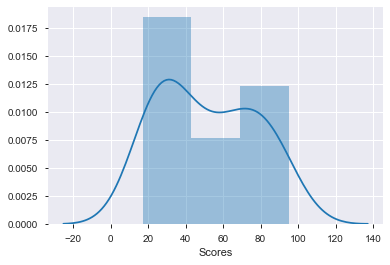

In [11]:
#Checking the dependent variable for normal distribution
sns.distplot(data.Scores)
plt.show()

In [12]:
#Train Test Split
train,test=train_test_split(data,test_size=0.3,random_state=120293)

### Linear Regression

In [13]:
#No need for variable reduction as there is only one independent variable

In [14]:
mod_val='Scores~Hours'

In [15]:
lm=smf.ols(mod_val,train).fit()

In [16]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     402.1
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           3.04e-12
Time:                        22:38:14   Log-Likelihood:                -49.717
No. Observations:                  17   AIC:                             103.4
Df Residuals:                      15   BIC:                             105.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0089      2.421      0.830      0.4

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [17]:
#Predicting for train and test datasets
train_pred=lm.predict(train.Hours)
test_pred=lm.predict(test.Hours)

In [18]:
#Evaluating the results

In [19]:
#RMSE
train_rmse=np.sqrt(metrics.mean_squared_error(train.Scores,train_pred))
test_rmse=np.sqrt(metrics.mean_squared_error(test.Scores,test_pred))
print('RMSE for Train:',train_rmse)
print('RMSE for Test:',test_rmse)

RMSE for Train: 4.506784331096997
RMSE for Test: 7.281933263265796


In [20]:
#MAPE
train_mape=np.mean(np.abs((train.Scores-train_pred)/train.Scores))
test_mape=np.mean(np.abs((test.Scores-test_pred)/test.Scores))
print('MAPE for Train:',train_mape)
print('MAPE for Test:',test_mape)

MAPE for Train: 0.11973057974822335
MAPE for Test: 0.11973258989946323


In [21]:
#Correlation
train_corr=stats.stats.pearsonr(train.Scores,train_pred)
test_corr=stats.stats.pearsonr(test.Scores,test_pred)
print('Correlation for Train:',train_corr)
print('Correlation for Test:',test_corr)

Correlation for Train: (0.9818555649851761, 3.0358576498298122e-12)
Correlation for Test: (0.9482382453151318, 0.0003333900706407021)


In [22]:
#Decile Analysis

In [23]:
train['Pred']=train_pred
train['Deciles']=pd.qcut(train['Pred'],10,labels=False)
predicted=train[['Deciles','Pred']].groupby(['Deciles']).Pred.mean().sort_values(ascending=False)
actual=train[['Deciles','Scores']].groupby(['Deciles']).Scores.mean().sort_values(ascending=False)
train_decile_analysis=pd.concat([predicted,actual],axis=1).sort_index(ascending=False)
train_decile_analysis.columns=['Predicted','Actual']
print('Decile Analysis for Train:\n',train_decile_analysis)

Decile Analysis for Train:
          Predicted  Actual
Deciles                   
9        88.830410    88.0
8        70.658456    73.5
7        57.534268    60.0
6        51.981726    50.5
5        40.371867    35.0
4        36.333655    36.0
3        29.266784    27.5
1        25.228572    25.0
0        15.133042    18.5


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
test['Pred']=test_pred
test['Deciles']=pd.qcut(test['Pred'],10,labels=False)
predicted=test[['Deciles','Pred']].groupby(['Deciles']).Pred.mean().sort_values(ascending=False)
actual=test[['Deciles','Scores']].groupby(['Deciles']).Scores.mean().sort_values(ascending=False)
test_decile_analysis=pd.concat([predicted,actual],axis=1).sort_index(ascending=False)
test_decile_analysis.columns=['Predicted','Actual']
print('Decile Analysis for Test:\n',test_decile_analysis)

Decile Analysis for Test:
          Predicted  Actual
Deciles                   
9        94.887728      88
8        87.820857      75
7        80.753986      86
5        76.715774      69
4        71.668009      76
2        63.591586      67
1        47.438738      41
0        34.314549      27


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Visualizing Results

In [25]:
data=pd.concat([train,test],axis=0)
data.sort_values(['Hours','Scores'],inplace=True)

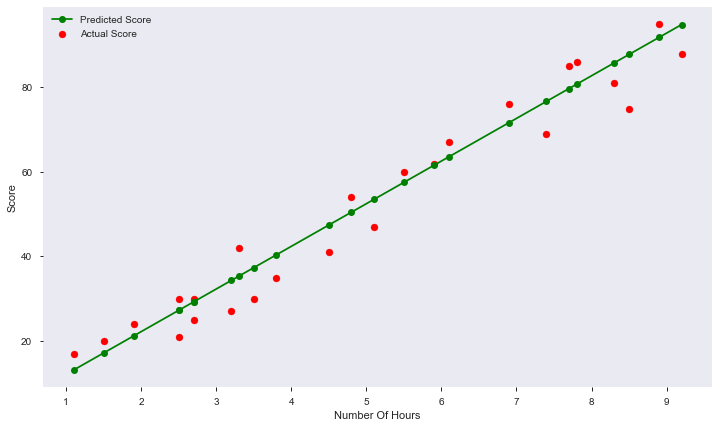

In [26]:
plt.figure(figsize=(12,7))
plt.grid()
plt.scatter(data.Hours,data.Scores,color='red',label='Actual Score')
plt.plot(data.Hours,data.Pred,color='green',marker='o',label='Predicted Score')
plt.xlabel('Number Of Hours')
plt.ylabel('Score')
plt.legend()
plt.show()

In [27]:
test_case_ser=pd.DataFrame([9.25])
test_case_ser.columns=['Hours']
#lm.predict(test_case_ser)

In [28]:
lm.predict(test_case_ser.Hours)

0    95.392505
dtype: float64